### Code-NN
 - It is way similar to tensorflow model but not as tensorflow, tensorflow is more advance than 
    this, but I am improving this a lot that It should compete tensorflow

In [135]:
import numpy as np
from sklearn.datasets import make_blobs,make_circles,make_classification
from one_hot_enocding import one_hot_encoding
from activation import softmax,ReLu

In [139]:
X = np.array([
    [0,0],
    [1,0],
    [0,1],
    [1,1]
])
y = np.array([0,1,1,0])
y = y.reshape(-1,1)

In [140]:
X.shape,y.shape

((4, 2), (4, 1))

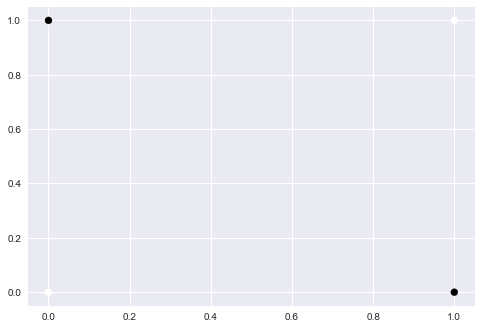

In [141]:
plt.scatter(X[:,0],X[:,1],c = y)
plt.show()

In [148]:
class MLP:
    
    def __init__(self,hidden_layers,output_layer,input_layer,activation = "relu",output_layer_activation = "softmax"):
        # Dictionary of all layers with its weight and bias
        model_layers = {}
        # make self varible for activation
        self.activation = activation
        # Total no of layers include input + hidden + output layers 
        total_layers = 1 + len(hidden_layers) + 1
        # layers list [input_layer,hidden_layer,output_layer]
        # layers[0]--->input_layer
        #layers[total_layer-1]--->output_layer
        layers = []
        layers.append(input_layer)
        for i in hidden_layers:
            layers.append(i)
        layers.append(output_layer)
        layers = np.array(layers)
        for layer_no in range(total_layers-1):
            model_layers[layer_no] = [np.random.randn(layers[layer_no],layers[layer_no+1]),np.zeros((1,layers[layer_no+1]))]
        # make class variable self.model_layers to store model_layers
        self.model_layers = model_layers
        
    # function to do forward pass
    def forward_propagation(self,X):
        '''
        This function forward_propagation will make model variable that is having 
        self.model_layers which includes weight and bias for particular layer,
        then it will 4 list i.e., activation units,weight matrix,bias matrix and 
        Z matrix, and it will return last activation unit.
        
        
        Take an input X(array) and do forward pass operation and return last activation
        function.
        
        example ->
        Input: X(array)
        Operation: hidden_layers = [4,3]
                   input_layer = 2
                   output_layer = 2
                   
                   total_layers = 4
                   layers = [2,4,3,2]
                   
                   Z[0] = X*W[0] + b[0]
                   A[0] = activation_function(Z[0])
                   
                   Z[1] = A[1]*W[1] + b[1]
                   A[1] = activation_function(Z[1])
        
                   Z[2] = A[1]*W[2] + b[2]
                   A[2] = activation_function(Z[2])
                   
        Output: A[2]
        '''
        # make model variable of self.model_layers
        model  = self.model_layers
        # make 4 lists of weight metrics, bias metrics, activation metrics, Z metrics
        W = []
        b = []
        Z = []
        A = []
        # append values in Weight metrics and bias metrics
        for key in model.keys():
            W.append(model[key][0])
            b.append(model[key][1])
        W = np.array(W)
        # append values in activation units metrics and Z mertics 
        for i in range(W.shape[0]):
            if i == 0:
                Z.append(np.dot(X,W[0]) + b[0])
                A.append(np.tanh(Z[0]))
                
            else :
                if i == W.shape[0] - 1:
                    Z.append(np.dot(A[i-1],W[i]) + b[i])
                    A.append(softmax(Z[i]))
                else:
                    Z.append(np.dot(A[i-1],W[i]) + b[i])
                    A.append(np.tanh(Z[i]))
                    
        # make class variables of all four lists
        self.activation_units = (A)
        self.W = (W)
        self.b = (b)
        self.Z = (Z)
        
        return A[-1]
    
    # function to do backpropagation in Multi Layer Perceptron
    def backward_propagation(self,X,y,learning_rate = 0.01):
        '''
        This function backward_propagation is initally taking self.model_layers,
        self.W,self.b,self.activation_units these 4 will help to do backpropagation 
        in Multi Layer Perceptron.
        
        As above 4 things will help in computing dZ,dW,db i.e., the derivatives of Z metrics,
        Weight metrics and bias metrics and later perform gradient descent algo. and
        update weight and biases
        
        It takes an input as X(input array) and its prediction array(y), and takes an
        input hyper-parameter learning_rate to perform gradient descent algo.
        
        Therefore, 
            Backpropagation is basiaclly perform gardient descent algo, and is to
            compute dZ,dW,db 
        example ->
        Input: X(input array)
        Operation: To Compute dZ,dW,db
                   we need W,b,Z,A
                   
                   dZ[2] = A[2] - y
                   dW[2] = (A[1].dZ[2])
                   db[2] = dZ[2]
                   
                   dZ[1] = derivative of activation_function * (dZ[2]*W[2])
                   dW[1] = (A[0].dZ[1])
                   db[1] = dZ[1]
                   
                   dZ[0] = derivative of activation_function * (dZ[1]*W[1])
                   dW[0] = (X.dZ[0])
                   db[0] = dZ[0]
                   
        Output: Perfrom Gradient Descent Algo
                W[i] -= learning_rate * dW[i]
                b[i] -= learning_rate * db[i]
        '''
        # make model variable of self.model_layers
        model  = self.model_layers
        W = self.W
        b = self.b
        A = self.activation_units
        dZ = []
        db = []
        dW = []
        # calculate dZ
        for i in reversed(range(W.shape[0])):
            if i == W.shape[0] - 1:
                dZ.append(A[i] - y)    
            else:
                if i == 0:
                    dZ.append( (1-np.square(A[i])) * np.dot(dZ[W.shape[0]-i-2],W[i+1].T) )
                else:
                    dZ.append( (1-np.square(A[i])) * np.dot(dZ[W.shape[0]-i-2],W[i+1].T) )
        # reverse dZ so that dZ will get be related to dW and db
        dZ = dZ[::-1]
        # calculate dW and db
        for i in range(W.shape[0]):
            if i == W.shape[0] - 1:
                dW.append(np.dot(A[i-1].T,dZ[i]))
                db.append(np.sum(dZ[i],axis = 0))    
            else:
                if i == 0:
                    dW.append(np.dot(X.T,dZ[i]))
                    db.append(np.sum(dZ[i],axis = 0))
                else:
                    dW.append(np.dot(A[i-1].T,dZ[i]))
                    db.append(np.sum(dZ[i],axis = 0))
            
            # perform gradient descent algo.
            W[i] -= learning_rate * dW[i]
            b[i] -= learning_rate * db[i]
        # class variable to store W and b, after updation
        self.W = W
        self.b = b
        
    # Predict function to perform prediction
    def predict(self,X):
        '''
        This function will takes an x_query as input and return the output as per
        given y(prediction)
        
        Return:
            1: Probabilities 
            2: index of max probability
        '''
        y_out = self.forward_propagation(X)
        
        return y_out,np.argmax(y_out,axis = 1)
    
    # Loss Function to calculate loss
    def loss(self,y_opt,p):
        '''
        It will calculate mean squared loss, i.e., categorical cross_entropy loss
        
        retuurn loss
        '''
        l = np.mean(y_opt*np.log(p))
        return -l
    
    # Training Function
    def train(self,X,y,batch_size,epochs,metrics):
        '''
        This Train function is basically doing training and perform particular metrics like 
        "accurcay","r2Score", depend on what we calculate, 
        and it will predict loss after every loss,
        it contains a list of training loss, that contains all the losses(the loss calculated after
        every iteration,
        example->
         X.shape[0] = 500
         BATCH_SIZE = 32
         NO_OF_ITERATIONS = int(X.shape[0]/BATCH_SIZE)-1
         training_loss.shape = (len(NO_OF_ITERATIONS))
         ).
         
        Prediction score will be calcuated after each epoch, and it is also having a numpy.ndarray
        that store all the prediction score, for each iteration, and shape is same as training_loss
        $ y should be one hot vector
        $ training_loss is numpy.ndarray
        $ epochs is hyper parameter
        $ metrics is hyper parameter
        '''
        training_loss = []
        y_opt = one_hot_encoding(y)
        
        for i in range(epochs):
            print("EPOCH-->{}".format(i+1))
            for j in range(int(X.shape[0]/batch_size) - 1):
                Y_ = self.forward_propagation(X[j*batch_size:(j+1)*batch_size])
                l = self.loss(y_opt[j*batch_size:(j+1)*batch_size],Y_)
                self.backward_propagation(X[j*batch_size:(j+1)*batch_size],y_opt[j*batch_size:(j+1)*batch_size])
                training_loss.append(l)
            print(" Training Loss----->  ",l)
            
        y_pred = []
        if metrics == "accuracy":
            for i in range(X.shape[0]):
                output,index = self.predict(X[i])
                y_pred.append(index)
            acc = np.sum(y_pred == y)/y.shape[0]
        return training_loss,acc*100

In [149]:
model = MLP([4,3],2,2)

In [150]:
model.train(X,y,1,20,"accuracy")

EPOCH-->1
 Training Loss----->   0.9767028883834902
EPOCH-->2
 Training Loss----->   0.9575038601256787
EPOCH-->3
 Training Loss----->   0.9384425656599039
EPOCH-->4
 Training Loss----->   0.9195277915555208
EPOCH-->5
 Training Loss----->   0.9007700577376262
EPOCH-->6
 Training Loss----->   0.8821812348810107
EPOCH-->7
 Training Loss----->   0.8637742198774904
EPOCH-->8
 Training Loss----->   0.8455626613460621
EPOCH-->9
 Training Loss----->   0.8275607251915063
EPOCH-->10
 Training Loss----->   0.8097828901513279
EPOCH-->11
 Training Loss----->   0.7922437643711073
EPOCH-->12
 Training Loss----->   0.7749579157739165
EPOCH-->13
 Training Loss----->   0.7579397109691625
EPOCH-->14
 Training Loss----->   0.7412031594356505
EPOCH-->15
 Training Loss----->   0.7247617615553277
EPOCH-->16
 Training Loss----->   0.7086283606669411
EPOCH-->17
 Training Loss----->   0.6928150005888478
EPOCH-->18
 Training Loss----->   0.6773327909903244
EPOCH-->19
 Training Loss----->   0.6621917835563356
EP

([0.34657359027997264,
  0.09729964626439017,
  0.9767028883834902,
  0.3351384670109749,
  0.0977917109317851,
  0.9575038601256787,
  0.32505283153034215,
  0.09813819151335203,
  0.9384425656599039,
  0.31618758481129466,
  0.09834923880891366,
  0.9195277915555208,
  0.3084197313028519,
  0.09843532110653669,
  0.9007700577376262,
  0.3016344137174669,
  0.09840695042943315,
  0.8821812348810107,
  0.29572595909769894,
  0.09827446932879655,
  0.8637742198774904,
  0.2905982014438825,
  0.09804789177660055,
  0.8455626613460621,
  0.28616431013397253,
  0.0977367901560846,
  0.8275607251915063,
  0.2823463063816273,
  0.0973502200927985,
  0.8097828901513279,
  0.27907440372346026,
  0.09689667539004022,
  0.7922437643711073,
  0.2762862686524322,
  0.09638406624699364,
  0.7749579157739165,
  0.2739262658389631,
  0.09581971499377977,
  0.7579397109691625,
  0.2719447286359152,
  0.09521036462366901,
  0.7412031594356505,
  0.2702972785590141,
  0.09456219635795345,
  0.7247617615